0.   To get Google Colab ready to use, 

> *   Create a exclusive folder on your Google Drive, name it "GoogleColab' for example,
*  Go to /GoogleColab, create a new notebook via Right Click > More > Colabratory,
*  Open the notebook, go to Runtime > Change runtime type. Pick your preferred version of python, (either one works fine with this notebook), and set the Hardware accelerator to GPU (You dont wanna do DL with CPU, do you?), 
*  Run the following basic python code just for fun.












In [0]:
x = 3
print(type(x))
print(x)
print(x**2)

<class 'int'>
3
9


1. Run the following code block, and follow the prompts to mount your google drive.You'll see something like this,

        Go to this URL in a browser: {https://accounts.google.com/xxx_some_link_xxx}
        Enter your authorization code:|_________|

    Click the link, copy verification code ,and paste it to text box.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


2. Verify that your google drive is properly mounted.

In [0]:
!ls -alhF /content/drive/My\ Drive/

total 953K
dr-x------ 3 root root 4.0K Feb 26  2018 '2XX 2018'/
drwx------ 3 root root 4.0K Oct 14 21:08  3XX/
drwx------ 3 root root 4.0K Jun 20 17:12  4XX/
drwx------ 2 root root 4.0K Jan 29  2017  CISC458/
dr-x------ 5 root root 4.0K Sep 20 02:33 'ECE 18 Drive'/
drwx------ 2 root root 4.0K Apr  2  2018  GoogleColab/
drwx------ 2 root root 4.0K Apr  2  2018  keras-master/
drwx------ 2 root root 4.0K Aug 24  2016  Outlook/
-rw------- 1 root root    1 Mar  9  2015 'Personal Statement_Yu Wan_7505354.gdoc'
-rw------- 1 root root 920K Mar 27  2015 'Progress Report-24.docx'
-rw------- 1 root root    1 Mar 27  2015 'Progress Report-24.docx.gdoc'


3. Install Keras.

In [0]:
!pip install -q keras
!pip list installed | grep -i keras

Keras                    2.1.6     
Keras-Applications       1.0.6     
Keras-Preprocessing      1.0.5     


4. Upload[ mnist_cnn.py](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py) to one of your google drive folders. (e.g. GoogleColab).

In [0]:
!ls -lh /content/drive/My\ Drive/GoogleColab/mnist_cnn.py

-rw------- 1 root root 2.8K Jul 11 06:34 '/content/drive/My Drive/GoogleColab/mnist_cnn.py'


5. Run the following code to train a simple mnist_cnn model. (Highly recommend using TF backend, much faster).

In [0]:
!python /content/drive/My\ Drive/GoogleColab/mnist_cnn.py

Using TensorFlow backend.
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
___________________________________________

Note: If you would like to change the Keras backend, for example, from Theano to TF, you may
1. Modify `~/.keras/keras.json`, OR
2. Run the following python code

In [0]:
from keras import backend as K
import os

def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("tensorflow")    # or set_keras_backend("theano")

Using TensorFlow backend.


**Code breakdown for `mnist_cnn.py` (with extra result-visualization capability)**


1.   Import required libraries. Note `matplotlib.pyplot` was not in the original `mnist_cnn.py`, it's added for the visualization capability.

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

%matplotlib inline
import matplotlib.pyplot as plt

2.   Training parameters, you may experiment with different `batch_size` and `epochs` .

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

3.   Process the dataset (load, split, reshape, etc.)

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


4.   Construct the convolutional neural network



In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

5.   Compile and train the CNN model.

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 12s 202us/step - loss: 0.2614 - acc: 0.9185 - val_loss: 0.0548 - val_acc: 0.9814
Epoch 2/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.0946 - acc: 0.9718 - val_loss: 0.0445 - val_acc: 0.9835
Epoch 3/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.0690 - acc: 0.9798 - val_loss: 0.0370 - val_acc: 0.9873
Epoch 4/12
60000/60000 [==============================] - 10s 172us/step - loss: 0.0565 - acc: 0.9838 - val_loss: 0.0331 - val_acc: 0.9893
Epoch 5/12
60000/60000 [==============================] - 11s 177us/step - loss: 0.0508 - acc: 0.9848 - val_loss: 0.0294 - val_acc: 0.9896
Epoch 6/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0430 - acc: 0.9874 - val_loss: 0.0270 - val_acc: 0.9914
Epoch 7/12
60000/60000 [==============================] - 10s 170us/step - loss: 0.0379 - acc: 0.9886 - val_loss: 0.

6.   Evaluate the CNN model.

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03317832631648748
Test accuracy: 0.9906


7.   Visualize the training result by plotting the first 36 images in the MNIST dataset.

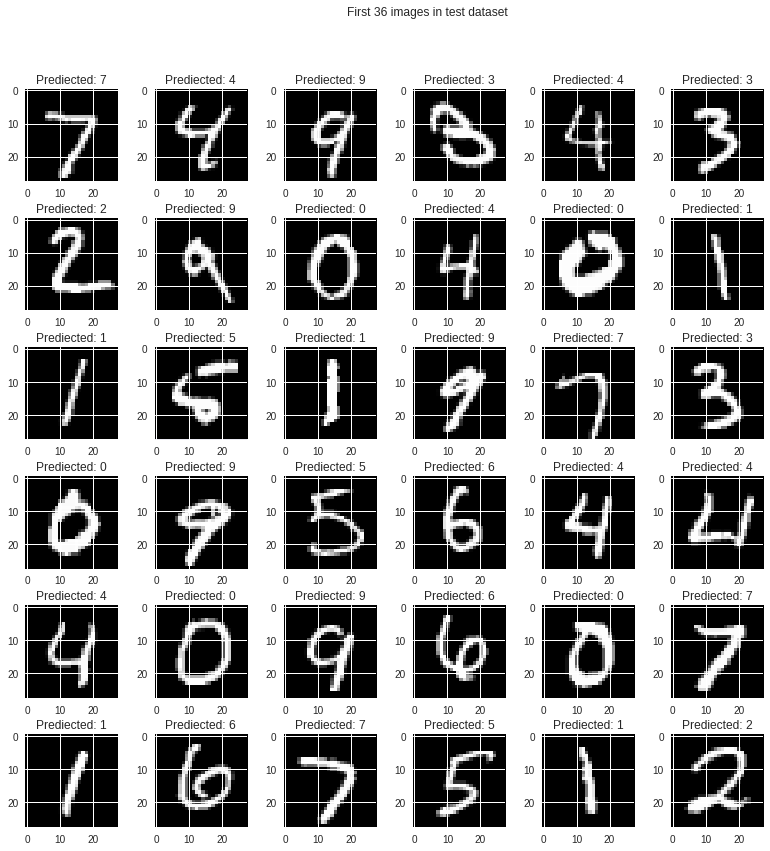

In [0]:
# plot first 36 images in MNIST
res = model.predict_classes(x_test[:36])
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in test dataset')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(x_test[x + y * 6].reshape((28, 28)), cmap = 'gray')
    ax[x, y].set_title("Prediected: %d" % res[x + y * 6])